<a href="https://colab.research.google.com/github/a-forty-two/EY_24Feb25_batch10/blob/main/27Feb_001_ColoredImageBreakDown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow # for google colab only

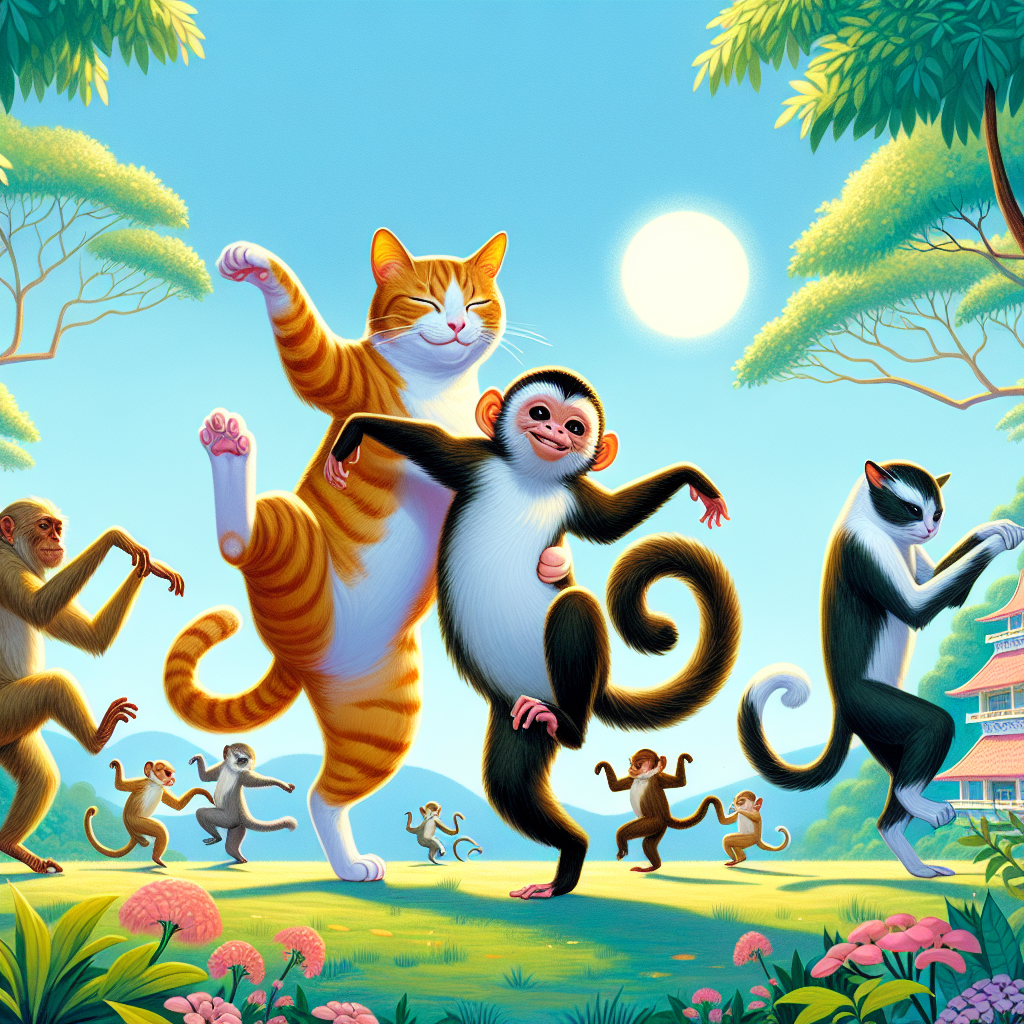

In [4]:
img = cv2.imread('image_name.jpg')
cv2_imshow(img)

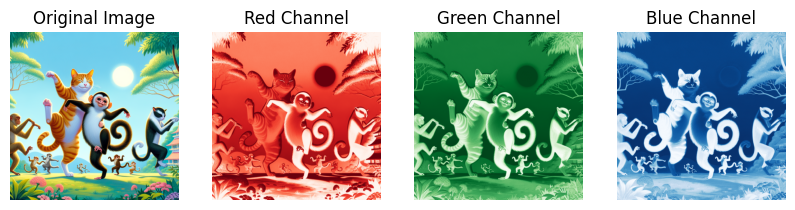

In [5]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img_rgb)
plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(r, cmap="Reds")
plt.title("Red Channel")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(g, cmap="Greens")
plt.title("Green Channel")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(b, cmap="Blues")
plt.title("Blue Channel")
plt.axis("off")

plt.show()


In [15]:
allcvoptions = dir(cv2)
for i in allcvoptions:
    if "COLOR_" in i:
      print(i)

CAP_PROP_XI_COLOR_FILTER_ARRAY
COLOR_BAYER_BG2BGR
COLOR_BAYER_BG2BGRA
COLOR_BAYER_BG2BGR_EA
COLOR_BAYER_BG2BGR_VNG
COLOR_BAYER_BG2GRAY
COLOR_BAYER_BG2RGB
COLOR_BAYER_BG2RGBA
COLOR_BAYER_BG2RGB_EA
COLOR_BAYER_BG2RGB_VNG
COLOR_BAYER_BGGR2BGR
COLOR_BAYER_BGGR2BGRA
COLOR_BAYER_BGGR2BGR_EA
COLOR_BAYER_BGGR2BGR_VNG
COLOR_BAYER_BGGR2GRAY
COLOR_BAYER_BGGR2RGB
COLOR_BAYER_BGGR2RGBA
COLOR_BAYER_BGGR2RGB_EA
COLOR_BAYER_BGGR2RGB_VNG
COLOR_BAYER_GB2BGR
COLOR_BAYER_GB2BGRA
COLOR_BAYER_GB2BGR_EA
COLOR_BAYER_GB2BGR_VNG
COLOR_BAYER_GB2GRAY
COLOR_BAYER_GB2RGB
COLOR_BAYER_GB2RGBA
COLOR_BAYER_GB2RGB_EA
COLOR_BAYER_GB2RGB_VNG
COLOR_BAYER_GBRG2BGR
COLOR_BAYER_GBRG2BGRA
COLOR_BAYER_GBRG2BGR_EA
COLOR_BAYER_GBRG2BGR_VNG
COLOR_BAYER_GBRG2GRAY
COLOR_BAYER_GBRG2RGB
COLOR_BAYER_GBRG2RGBA
COLOR_BAYER_GBRG2RGB_EA
COLOR_BAYER_GBRG2RGB_VNG
COLOR_BAYER_GR2BGR
COLOR_BAYER_GR2BGRA
COLOR_BAYER_GR2BGR_EA
COLOR_BAYER_GR2BGR_VNG
COLOR_BAYER_GR2GRAY
COLOR_BAYER_GR2RGB
COLOR_BAYER_GR2RGBA
COLOR_BAYER_GR2RGB_EA
COLOR_BAYER_GR2R

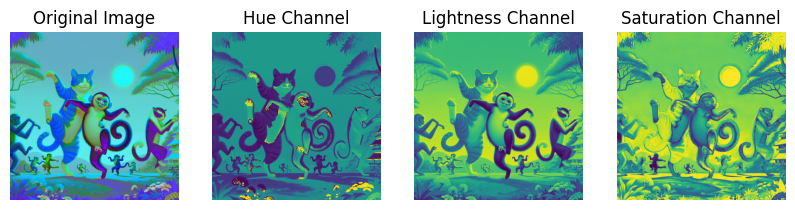

In [16]:
img_cmy = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
r, g, b = cv2.split(img_cmy)
plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(img_cmy)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(r)
plt.title("Hue Channel")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(g)
plt.title("Lightness Channel")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(b)
plt.title("Saturation Channel")
plt.axis("off")

plt.show()


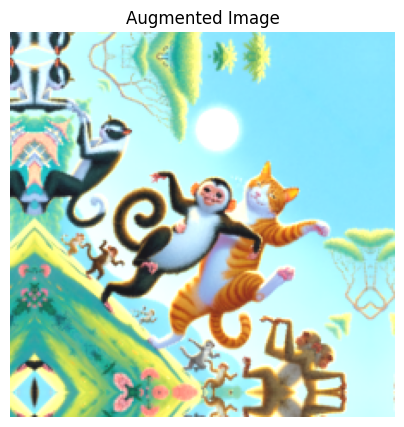

In [6]:
img_tensor = tf.convert_to_tensor(img_rgb, dtype=tf.float32)
img_tensor = tf.image.resize(img_tensor, [224, 224])  # Resize for consistency
img_tensor = tf.expand_dims(img_tensor, axis=0)  # Add batch dimension

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomBrightness(0.2),
])


augmented_img = data_augmentation(img_tensor)
augmented_img_np = augmented_img[0].numpy().astype("uint8")

plt.figure(figsize=(5, 5))
plt.imshow(augmented_img_np)
plt.title("Augmented Image")
plt.axis("off")
plt.show()


In [9]:
len(augmented_img)

1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


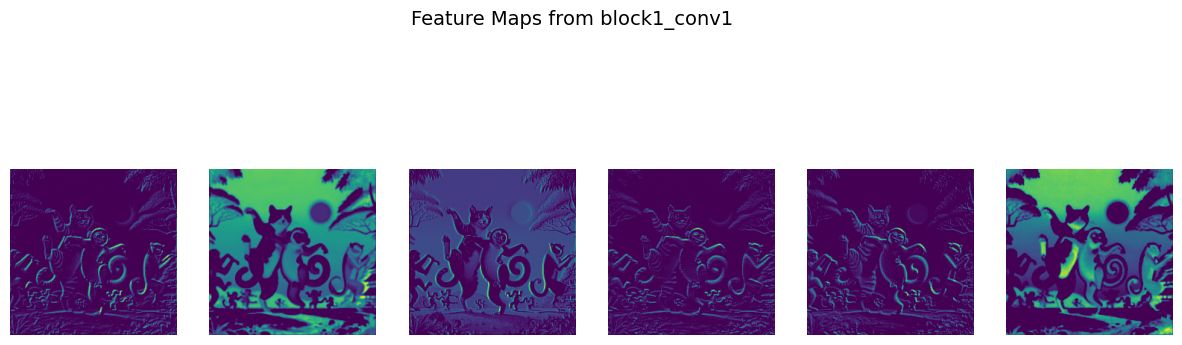

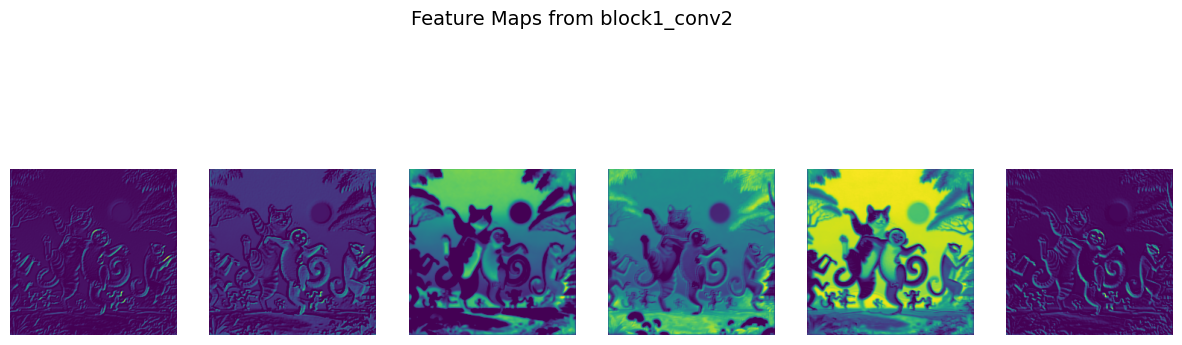

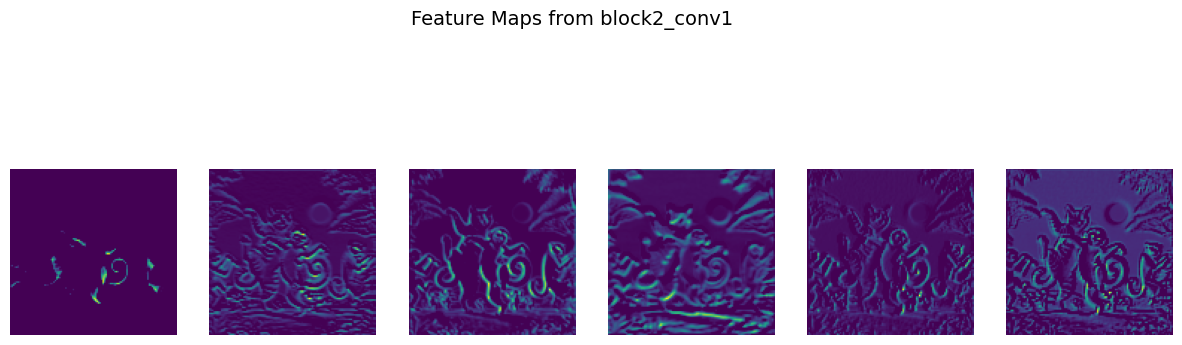

In [8]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Load Pretrained VGG16 Model (Without Fully Connected Layers)
base_model = VGG16(weights='imagenet', include_top=False)

# Extract Initial Convolutional Layers (Only Conv Layers)
conv_layers = [layer for layer in base_model.layers if 'conv' in layer.name][:3]  # Extract first 3 Conv layers
layer_outputs = [layer.output for layer in conv_layers]  # Get outputs

feature_extractor = Model(inputs=base_model.input, outputs=layer_outputs)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img_rgb, (224, 224))  # Resize for VGG16
img_array = np.expand_dims(img_resized, axis=0)  # Add batch dimension
img_array = tf.keras.applications.vgg16.preprocess_input(img_array)  # Normalize

# Pass Image Through Model
feature_maps = feature_extractor.predict(img_array)

# Display Feature Maps
for layer_name, feature_map in zip([layer.name for layer in conv_layers], feature_maps):
    num_filters = feature_map.shape[-1]  # Get number of filters in layer
    fig, axes = plt.subplots(1, min(num_filters, 6), figsize=(15, 5))  # Show first 6 filters
    fig.suptitle(f"Feature Maps from {layer_name}", fontsize=14)

    for i in range(min(num_filters, 6)):  # Display first 6 feature maps
        ax = axes[i]
        ax.imshow(feature_map[0, :, :, i], cmap='viridis')  # Display activation map
        ax.axis('off')

    plt.show()
